# Surface plasmon resonance (SPR) modeling & analysis

## Task Summary

The SPR modeling analysis program creates a curve following the reflectance formula given in the paper by Simon, Mitchell and Watson, Eq. (11).  Your task is to recreate this function with Python code and plot it under your data points for at least one or two data sets.  This will give you deeper insight into the fitting formula.

Start by creating functions for the quantities that go into Eq. (11).  These are Eqs. (7), (9b) and (9c), along with Eqs. (10a) and (10b).  The quantities that feed in are the complex dielectric permittivity  and the index of reflection of the glass $n$, along with $\omega/c=k_0=2\pi/\lambda$. 

Then combine the functions into a single one that gives the reflectance R, Eq. (11).

Be careful to convert your angles from degrees to radians before feeding them to the functions!  (This is the most common mistake students make.)

You will need to make sure all quantities are represented by complex data types, even if the physical quantity is real-valued.

Once you have a working function, you may try to see if you can make it work with LMfit.  In principal this is possible, but prepare for some challenges if your function is not of the required form for LMfit’s library calls. 


In [16]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
import cmath as cm
import numpy.lib.scimath as SM
%matplotlib inline

In [17]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,6.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Reflectance modeling equations 

Main equation for normalized reflected intensity (SMW, Eq. 11):

$$R = \left|\frac{r_{pm} + r_{ma}\exp(-2kd)}{1+r_{pm}r_{ma}\exp(-2kd)}\right|^2$$

where $r_{pm}$ and $r_{ma}$ are the reflection amplitudes from the prism-metal interface and the metal-air interface, and $d$ is the film thickness.

The parameter $k$ is the "absorption coefficient at non-normal incidence" (SMW, Eq. 7):

$$k = -i\frac{\omega}{c}\left(\epsilon - n^2\sin^2\theta_1\right)^{1/2}$$

We replace $\omega/c$ with the wavenumber in free space $k_0=2\pi/\lambda_0$ of the incident light.

The reflection amplitudes are given by (SMW, Eq. 9b)

$$r_{pm} = \frac{\epsilon^{1/2}\cos\theta_1 - n\cos\theta_2}{\epsilon^{1/2}\cos\theta_1 + n\cos\theta_2}$$
and (SMW, Eq. 9c)
$$r_{ma} = \frac{\cos\theta_2 - \epsilon^{1/2}\cos\theta_3}{\cos\theta_2 + \epsilon^{1/2}\cos\theta_3}$$

where (SMW, Eq. 10a)

$$\cos\theta_2 = \left(1-(n^2/\epsilon)\sin^2\theta_1\right)^{1/2}$$
and (SMW, Eq. 10b)
$$\cos\theta_3 = \left(1-n^2\sin^2\theta_1\right)^{1/2}$$

### Create functions for the above equations

In [22]:
# Enter the appropriate values
wavelength_green = 543.5 #nanometers
wavelength_red = 632.8 #nanometers
N_red = 1.515 # unitless
N_green = 1.519 # unitless

d_default = 50 # nanometers
eps_default = -10
one = complex(1.0, 0.0)
minus_i = complex(0.0, -1.0)

wavenum_red = 2.0*np.pi/wavelength_red
wavenum_green = 2.0*np.pi/wavelength_green

In [23]:
# For each function fill in the details

def cos_theta2(theta_1, epsilon, N):
    # You code this
    cos_th2 = SM.sqrt(one - N**2 * np.sin(theta_1)**2/(epsilon))
    
    return cos_th2

def cos_theta3(theta_1, N):
    # You code this
    cos_th3 = SM.sqrt(one - N**2 * np.sin(theta_1)**2)
    
    return cos_th3

def k_plas(theta_1, epsilon, N, wavenum):
    # You code this
    k_p = minus_i*wavenum*SM.sqrt(epsilon-N**2*np.sin(theta_1)**2)
    
    return k_p

def r_ma(theta_1, epsilon, N):
    # You code this
    r_23 = (cos_theta2(theta_1,epsilon,N)-SM.sqrt(epsilon)*cos_theta3(theta_1,N))/(cos_theta2(theta_1,epsilon,N)+SM.sqrt(epsilon)*cos_theta3(theta_1,N))
    
    return r_23

def r_pm(theta_1, epsilon, N):
    # You code this 
    r_12 = ((SM.sqrt(epsilon)*np.cos(theta_1))-(N*cos_theta2(theta_1,epsilon,N)))/((SM.sqrt(epsilon)*np.cos(theta_1))+(N*cos_theta2(theta_1,epsilon,N)))
                                                                         
    return r_12

def R(theta_1, epsilon = eps_default, d=d_default, N = N_red, wavenum = wavenum_red):
    # You code this
    big_R = (r_pm(theta_1,epsilon,N)+r_ma(theta_1,epsilon,N)*np.exp(-2*k_plas(theta_1,epsilon,N,wavenum)*d))/(one+r_pm(theta_1,epsilon,N)*r_ma(theta_1,epsilon,N)*np.exp(-2*k_plas(theta_1,epsilon,N,wavenum)*d))
    big_R = np.abs(big_R)**2
    
    return big_R

### Test the reflectance 

Test the above functions by feeding in a range of angles typical for the experiment, say between 41 and 50 degrees.  (Don't forget to convert to radians, or you will get some strange looking curves.) Use your fit resuslts from the LabVIEW analysis.

You can use the NumPy function `np.linspace()` to genrate an array of evenly spaced values between a lower and upper limit.  For example to get an array of 500 numbers between 41 and 50, do this:

    angles =  np.linspace(41.0,50.0,500)

In [24]:
angles = np.linspace(41.0, 50.0, 500) # set a range of angles
rad_angles = (np.pi/180.0)*angles # convert them to radians to pass to your functions

my_eps = complex(-9.03, 0.828) # enter a value of epsilon
my_d = 40.369 # enter a value of thickness

## Make a plot

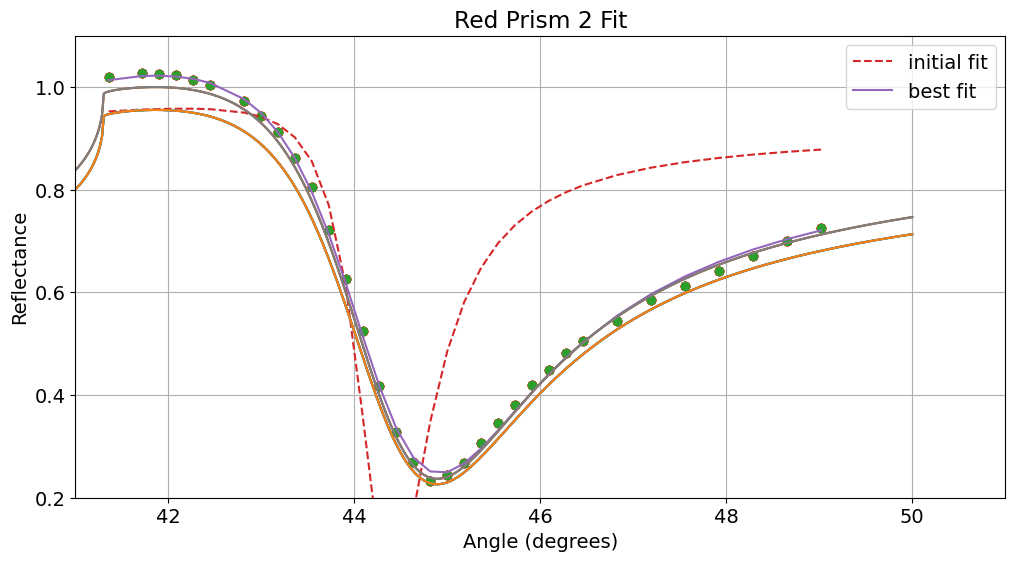

In [29]:
# Pass the above variables to your functions and plot them

reflections = R(theta_1 = rad_angles, epsilon = my_eps, d = my_d)

plt.plot(angles, reflections)
plt.xlabel('Angle (degrees)')
plt.ylabel('Reflectance')
plt.ylim(0.2, 1.1)
plt.xlim(41, 51)
plt.grid(True)
plt.show()

## Plot the model against data

In [28]:
# Read in a data file and print it to see that it looks right
red2_data = pd.read_csv('RedP2', sep='\t')
print(red2_data)

    Theta (deg)  Intensity  Phi_A (deg)  Micrometer (mm)
0       41.3581     1.0201       5.5207            13.50
1       41.7222     1.0269       4.9679            13.00
2       41.9042     1.0260       4.6916            12.75
3       42.0863     1.0234       4.4154            12.50
4       42.2683     1.0145       4.1392            12.25
5       42.4504     1.0031       3.8631            12.00
6       42.8145     0.9735       3.3111            11.50
7       42.9966     0.9436       3.0351            11.25
8       43.1786     0.9129       2.7592            11.00
9       43.3607     0.8621       2.4832            10.75
10      43.5428     0.8044       2.2073            10.50
11      43.7249     0.7216       1.9315            10.25
12      43.9070     0.6253       1.6556            10.00
13      44.0891     0.5253       1.3797             9.75
14      44.2712     0.4180       1.1038             9.50
15      44.4534     0.3289       0.8279             9.25
16      44.6356     0.2699     

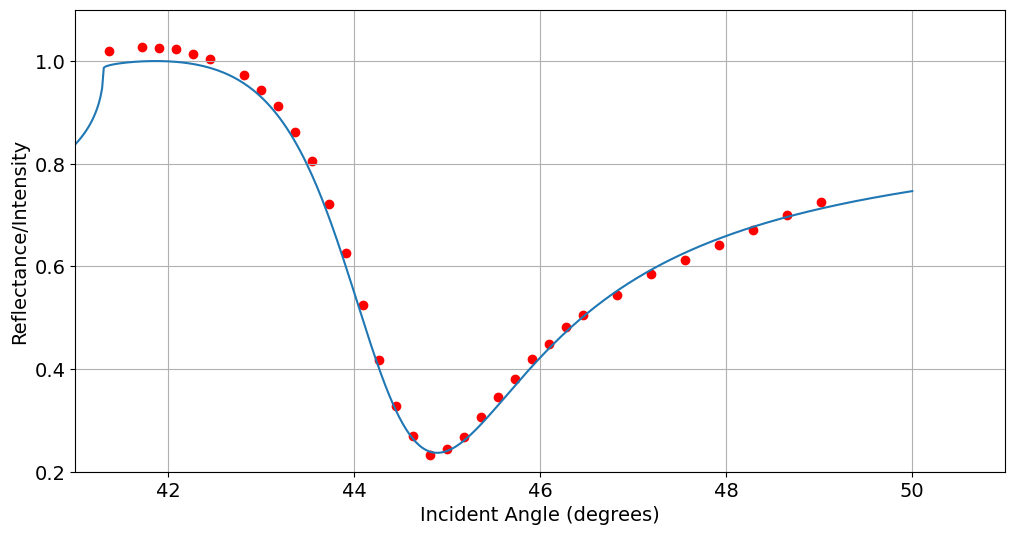

In [30]:
# Redo plot above, but add the data to compare

plt.scatter(red2_data["Theta (deg)"], red2_data["Intensity"], color = 'red')
reflections_norm = 1/max(reflections)
plt.plot(angles,reflections*reflections_norm) 
plt.xlabel('Incident Angle (degrees)')
plt.ylabel('Reflectance/Intensity')
plt.ylim(0.2, 1.1)
plt.xlim(41, 51)
plt.grid(True)
plt.show()

## Try a fit with LMFit

In [9]:
# Create a fit function to build into a model

def R_fitter(x, eps_re, eps_im, d, I, N=N_red, wavenum=wavenum_red):
    return I*R(x*np.pi/180.0, epsilon=complex(eps_re,eps_im),
               d=d, N=N, wavenum=wavenum)

## Key statement to pull Model class in.
from lmfit import Model

## First argument is the function name.  The last argument is 
#  passed directly to the fitting function and is not adjusted during thefit

model_red = Model(R_fitter, param_names=['eps_re','eps_im','d','I'],N=N_red, wavenum=wavenum_red)
model_green = Model(R_fitter, param_names=['eps_re','eps_im','d','I'],N=N_green, wavenum=wavenum_green)

In [10]:
# Make and set the parameters to their starying values
# These should be close to what you got with the LabVIEW modeling program
red2_params = model_red.make_params(eps_re = -9.38, eps_im = 0.55, d = 58.70, I = 1.0)    

[[Model]]
    Model(R_fitter, N='1.515', wavenum='0.009929180321080257')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 34
    # variables        = 4
    chi-square         = 0.00277716
    reduced chi-square = 9.2572e-05
    Akaike info crit   = -312.031402
    Bayesian info crit = -305.925960
    R-squared          = 0.99884209
[[Variables]]
    eps_re: -8.99965633 +/- 0.02903288 (0.32%) (init = -9.38)
    eps_im:  0.83577262 +/- 0.00926135 (1.11%) (init = 0.55)
    d:       40.0220444 +/- 0.25464606 (0.64%) (init = 58.7)
    I:       1.07003927 +/- 0.00388800 (0.36%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(eps_re, d)      = +0.7845
    C(eps_im, I)      = +0.7350
    C(eps_im, d)      = -0.7320
    C(eps_re, eps_im) = -0.6629
    C(d, I)           = -0.4553
    C(eps_re, I)      = -0.3719


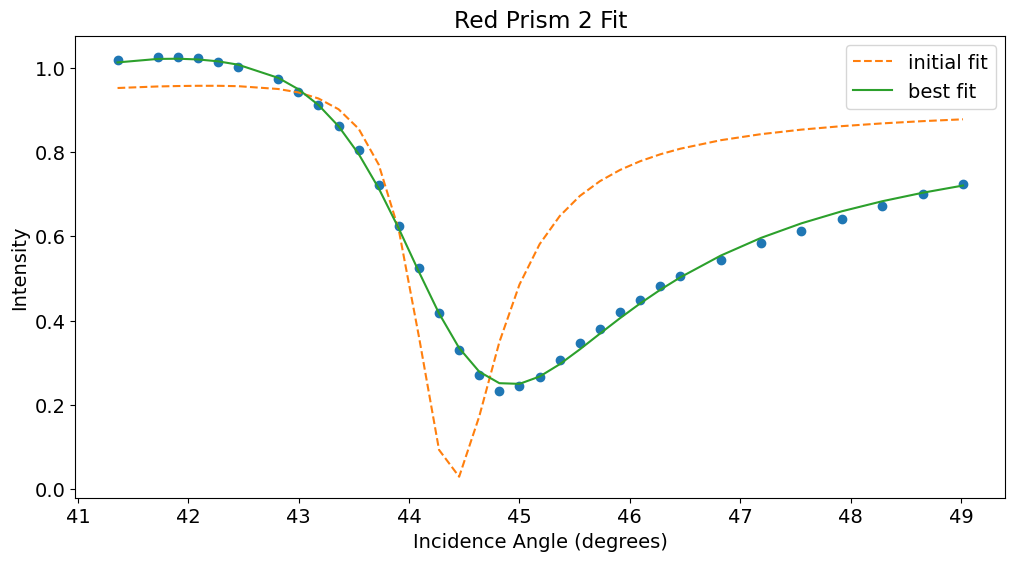

-9.000+/-0.029 0.836+/-0.009


In [31]:
# Run the fit
result_red2 = model_red.fit(red2_data['Intensity'],
                            red2_params, x=red2_data['Theta (deg)'])

# Print the results
print(result_red2.fit_report())

# Make a plot
theta_space_r2 = np.linspace(red2_data['Theta (deg)'].iloc[0],
                             red2_data['Theta (deg)'].iloc[-1], 500)
plt.plot(red2_data['Theta (deg)'], red2_data['Intensity'], 'o')
plt.plot(red2_data['Theta (deg)'], result_red2.init_fit, '--', label='initial fit')
plt.plot(red2_data['Theta (deg)'], result_red2.best_fit, '-', label='best fit')
plt.xlabel('Incidence Angle (degrees)')
plt.ylabel('Intensity')
plt.title('Red Prism 2 Fit')
plt.legend()
plt.show()
#Uncertainties of the fit
eps_re_red2_v = result_red2.params['eps_re'].value
eps_im_red2_v = result_red2.params['eps_im'].value
ep_re_r2_unc = result_red2.params['eps_re'].stderr
ep_im_r2_unc = result_red2.params['eps_im'].stderr

eps_re_red2 = unc.ufloat(eps_re_red2_v, ep_re_r2_unc)
eps_im_red2 = unc.ufloat(eps_im_red2_v, ep_im_r2_unc)
print(eps_re_red2, eps_im_red2)